In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
from sklearn.feature_selection import SelectKBest, f_classif, chi2
import openpyxl

In [70]:
df=pd.read_csv("dataweek11.csv",delimiter=',')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 3000 non-null   int64  
 1   gender             3000 non-null   object 
 2   age                3000 non-null   float64
 3   hypertension       3000 non-null   int64  
 4   heart_disease      3000 non-null   int64  
 5   ever_married       3000 non-null   object 
 6   work_type          3000 non-null   object 
 7   Residence_type     3000 non-null   object 
 8   avg_glucose_level  3000 non-null   float64
 9   bmi                2861 non-null   float64
 10  smoking_status     3000 non-null   object 
 11  stroke             3000 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 281.4+ KB


# PREPOCESS

In [72]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [73]:
#ngubah data type yg ga sesuai
df['age']=df['age'].astype(int)
df['id']=df['id'].astype(str)
df['heart_disease']=df['heart_disease'].astype(str)
df['hypertension']=df['hypertension'].astype(str)

In [74]:
df.dtypes

id                    object
gender                object
age                    int32
hypertension          object
heart_disease         object
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [75]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  139
smoking_status         0
stroke                 0
dtype: int64

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


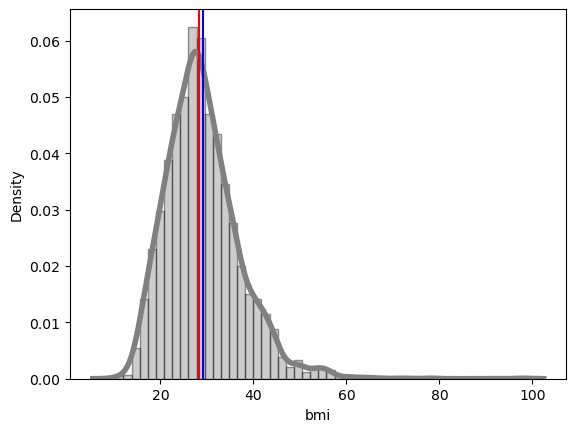

In [76]:
sns.distplot(df['bmi'],hist=True,kde=True,
            color='grey',hist_kws={'edgecolor':'black'}, kde_kws={'linewidth':4})
plt.axvline(df['bmi'].mean(),color='blue')
plt.axvline(df['bmi'].median(),color='red')

In [77]:
df['bmi']=df['bmi'].fillna(df['bmi'].median())

In [78]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [79]:
dat=df._get_numeric_data()

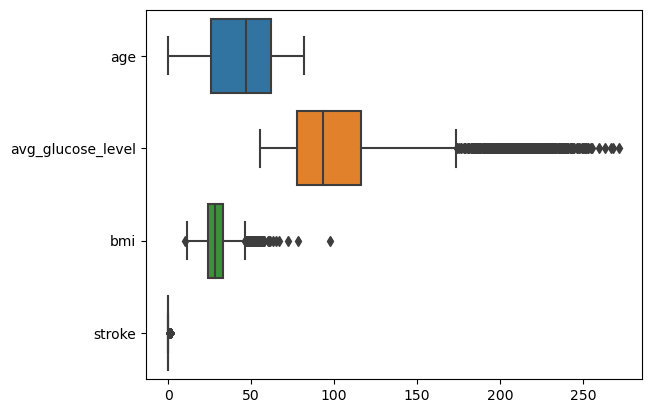

In [80]:
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt


# plotting box plot
# using the orient parameter for orientation of each numeric variable
sb.boxplot( data = dat, orient="h")

# display
plt.show()

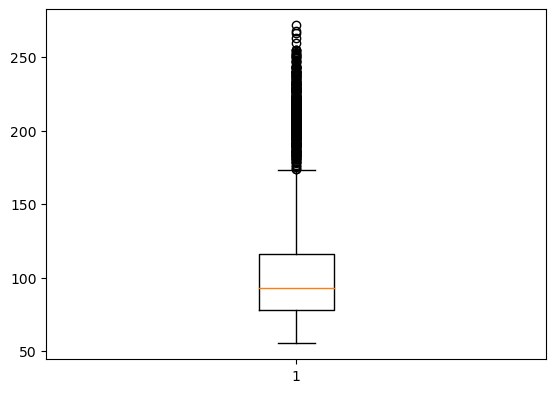

In [81]:
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0.5, 0.5, 0.5, 0.5])
 
# Creating plot
bp = ax.boxplot(df['avg_glucose_level'])
 
# show plot
plt.show()

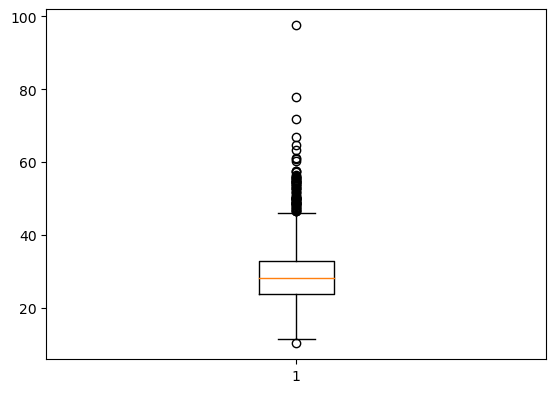

In [82]:
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0.5, 0.5, 0.5, 0.5])
 
# Creating plot
bp = ax.boxplot(df['bmi'])
 
# show plot
plt.show()

In [83]:
#df.to_csv('D:/smt6/datmin/TK_MaulLala.csv')

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 3000 non-null   object 
 1   gender             3000 non-null   object 
 2   age                3000 non-null   int32  
 3   hypertension       3000 non-null   object 
 4   heart_disease      3000 non-null   object 
 5   ever_married       3000 non-null   object 
 6   work_type          3000 non-null   object 
 7   Residence_type     3000 non-null   object 
 8   avg_glucose_level  3000 non-null   float64
 9   bmi                3000 non-null   float64
 10  smoking_status     3000 non-null   object 
 11  stroke             3000 non-null   int64  
dtypes: float64(2), int32(1), int64(1), object(8)
memory usage: 269.7+ KB


### encoding kategorik to numerik

In [85]:
from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(df['gender'])

# removing the column 'gender' from df
# as it is of no use now.
df.drop('gender', axis=1, inplace=True)
 
# Appending the array to our dataFrame
# with column name 'gender'
df['gender'] = label
 
# printing Dataframe
df

,id,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender
0,9046,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1
1,51676,61,0,0,Yes,Self-employed,Rural,202.21,28.2,never smoked,1,0
2,31112,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,1
3,60182,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,0
4,1665,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,4750,78,0,0,Yes,Private,Urban,85.03,26.1,formerly smoked,0,1
2996,65127,35,0,0,Yes,Private,Urban,80.76,28.8,smokes,0,0
2997,4498,71,0,1,Yes,Private,Urban,204.98,28.2,formerly smoked,0,1
2998,32203,57,0,0,Yes,Self-employed,Rural,95.36,32.4,formerly smoked,0,0


In [86]:
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(df['ever_married'])

# removing the column 'gender' from df
# as it is of no use now.
df.drop('ever_married', axis=1, inplace=True)
 
# Appending the array to our dataFrame
# with column name 'gender'
df['ever_married'] = label
 
# printing Dataframe
df

,id,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender,ever_married
0,9046,67,0,1,Private,Urban,228.69,36.6,formerly smoked,1,1,1
1,51676,61,0,0,Self-employed,Rural,202.21,28.2,never smoked,1,0,1
2,31112,80,0,1,Private,Rural,105.92,32.5,never smoked,1,1,1
3,60182,49,0,0,Private,Urban,171.23,34.4,smokes,1,0,1
4,1665,79,1,0,Self-employed,Rural,174.12,24.0,never smoked,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,4750,78,0,0,Private,Urban,85.03,26.1,formerly smoked,0,1,1
2996,65127,35,0,0,Private,Urban,80.76,28.8,smokes,0,0,1
2997,4498,71,0,1,Private,Urban,204.98,28.2,formerly smoked,0,1,1
2998,32203,57,0,0,Self-employed,Rural,95.36,32.4,formerly smoked,0,0,1


In [87]:
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(df['work_type'])

# removing the column 'gender' from df
# as it is of no use now.
df.drop('work_type', axis=1, inplace=True)
 
# Appending the array to our dataFrame
# with column name 'gender'
df['work_type'] = label
 
# printing Dataframe
df

,id,age,hypertension,heart_disease,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender,ever_married,work_type
0,9046,67,0,1,Urban,228.69,36.6,formerly smoked,1,1,1,2
1,51676,61,0,0,Rural,202.21,28.2,never smoked,1,0,1,3
2,31112,80,0,1,Rural,105.92,32.5,never smoked,1,1,1,2
3,60182,49,0,0,Urban,171.23,34.4,smokes,1,0,1,2
4,1665,79,1,0,Rural,174.12,24.0,never smoked,1,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,4750,78,0,0,Urban,85.03,26.1,formerly smoked,0,1,1,2
2996,65127,35,0,0,Urban,80.76,28.8,smokes,0,0,1,2
2997,4498,71,0,1,Urban,204.98,28.2,formerly smoked,0,1,1,2
2998,32203,57,0,0,Rural,95.36,32.4,formerly smoked,0,0,1,3


In [88]:
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(df['Residence_type'])

# removing the column 'gender' from df
# as it is of no use now.
df.drop('Residence_type', axis=1, inplace=True)
 
# Appending the array to our dataFrame
# with column name 'gender'
df['Residence_type'] = label
 
# printing Dataframe
df

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke,gender,ever_married,work_type,Residence_type
0,9046,67,0,1,228.69,36.6,formerly smoked,1,1,1,2,1
1,51676,61,0,0,202.21,28.2,never smoked,1,0,1,3,0
2,31112,80,0,1,105.92,32.5,never smoked,1,1,1,2,0
3,60182,49,0,0,171.23,34.4,smokes,1,0,1,2,1
4,1665,79,1,0,174.12,24.0,never smoked,1,0,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,4750,78,0,0,85.03,26.1,formerly smoked,0,1,1,2,1
2996,65127,35,0,0,80.76,28.8,smokes,0,0,1,2,1
2997,4498,71,0,1,204.98,28.2,formerly smoked,0,1,1,2,1
2998,32203,57,0,0,95.36,32.4,formerly smoked,0,0,1,3,0


In [89]:
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(df['smoking_status'])

# removing the column 'gender' from df
# as it is of no use now.
df.drop('smoking_status', axis=1, inplace=True)
 
# Appending the array to our dataFrame
# with column name 'gender'
df['smoking_status'] = label
 
# printing Dataframe
df

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender,ever_married,work_type,Residence_type,smoking_status
0,9046,67,0,1,228.69,36.6,1,1,1,2,1,1
1,51676,61,0,0,202.21,28.2,1,0,1,3,0,2
2,31112,80,0,1,105.92,32.5,1,1,1,2,0,2
3,60182,49,0,0,171.23,34.4,1,0,1,2,1,3
4,1665,79,1,0,174.12,24.0,1,0,1,3,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,4750,78,0,0,85.03,26.1,0,1,1,2,1,1
2996,65127,35,0,0,80.76,28.8,0,0,1,2,1,3
2997,4498,71,0,1,204.98,28.2,0,1,1,2,1,1
2998,32203,57,0,0,95.36,32.4,0,0,1,3,0,1


In [90]:
df.dtypes

id                    object
age                    int32
hypertension          object
heart_disease         object
avg_glucose_level    float64
bmi                  float64
stroke                 int64
gender                 int32
ever_married           int32
work_type              int32
Residence_type         int32
smoking_status         int32
dtype: object

### transformasi

In [91]:
df['age']=(df['age']-df['age'].min())/(df['age'].max()-df['age'].min())
df['avg_glucose_level']=(df['avg_glucose_level']-df['avg_glucose_level'].min())/(df['avg_glucose_level'].max()-df['avg_glucose_level'].min())
df['bmi']=(df['bmi']-df['bmi'].min())/(df['bmi'].max()-df['bmi'].min())
df.dtypes

id                    object
age                  float64
hypertension          object
heart_disease         object
avg_glucose_level    float64
bmi                  float64
stroke                 int64
gender                 int32
ever_married           int32
work_type              int32
Residence_type         int32
smoking_status         int32
dtype: object

# SVM

In [174]:
#Mendefinisikan variabel stroke sebagai target (y)
y=df['stroke']

#Mengetahui banyaknya data setiap kategori
df['stroke'].value_counts()

0    2751
1     249
Name: stroke, dtype: int64

In [175]:
#Mendefinisikan features sebagai x
x=df.drop(['id','stroke'], axis=1)
x.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender,ever_married,work_type,Residence_type,smoking_status
0,0.817073,0,1,0.801173,0.301260,1,1,2,1,1
1,0.743902,0,0,0.678875,0.205040,0,1,3,0,2
2,0.975610,0,1,0.234159,0.254296,1,1,2,0,2
3,0.597561,0,0,0.535793,0.276060,0,1,2,1,3
4,0.963415,1,0,0.549141,0.156930,0,1,3,0,2


In [176]:
y=y.values
x=x.values

In [177]:
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [178]:
x

array([[0.8170731707317073, '0', '1', ..., 2, 1, 1],
       [0.7439024390243902, '0', '0', ..., 3, 0, 2],
       [0.975609756097561, '0', '1', ..., 2, 0, 2],
       ...,
       [0.8658536585365854, '0', '1', ..., 2, 1, 1],
       [0.6951219512195121, '0', '0', ..., 3, 0, 1],
       [0.14634146341463414, '0', '0', ..., 4, 1, 0]], dtype=object)

In [179]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn import svm

In [180]:
#Crossvalidation
cv=StratifiedKFold(n_splits=2, random_state=None) #n splits terserah ngesplit train testing
ss=svm.SVC(class_weight=None,random_state=2) #the weight is unknown
model=ss.fit(x,y)

In [181]:

parameter={
    'kernel':('linear', 'poly', 'rbf'),
    'C':[0.0001, 0.001, 0.01,0.1, 1, 10, 100, 1000, 10000],
    'gamma':[0.0001, 0.001, 0.01,0.1, 1, 10, 100, 1000, 10000],
}
grid=GridSearchCV(model, parameter, cv=cv, n_jobs=1, scoring='accuracy') #untuk mencari paraeter yang terbaik yang mana
grid

GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             estimator=SVC(random_state=2), n_jobs=1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               10000],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000],
                         'kernel': ('linear', 'poly', 'rbf')},
             scoring='accuracy')

In [182]:
#gridfit=grid.fit(x,y)
#gridfit.best_params_

### kernel linear

In [183]:
from sklearn import svm
svm=svm.SVC(class_weight=None,C=100, gamma=100, kernel='linear',
           random_state=100)
n=5
from sklearn.model_selection import StratifiedKFold
kf=StratifiedKFold(n_splits=n, random_state=None)

In [184]:
svm.fit(x,y)
y_pred=svm.predict(x)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [185]:
#membuat tempat
cm=[]
total=[]
ac=[]
se=[]
sp=[]

In [186]:
for train_index, test_index in kf.split(x,y):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [187]:
x_train

array([[0.8170731707317073, '0', '1', ..., 2, 1, 1],
       [0.7439024390243902, '0', '0', ..., 3, 0, 2],
       [0.975609756097561, '0', '1', ..., 2, 0, 2],
       ...,
       [0.975609756097561, '0', '0', ..., 3, 1, 2],
       [0.7926829268292683, '0', '0', ..., 2, 1, 2],
       [0.2926829268292683, '0', '0', ..., 2, 1, 0]], dtype=object)

In [188]:
for train_index, test_index in kf.split(x,y):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    svm.fit(x_train, y_train)
    y_pred = svm.predict(x_test)
    cm.append((confusion_matrix(y_test, y_pred)).astype(float))
for j in range (n):
    total.append(sum(sum(cm[j])))
    ac.append((cm[j][0,0]+cm[j][1,1])/total[j])
    se.append(cm[j][0,0]/(cm[j][0,0]+cm[j][0,1]))
    sp.append(cm[j][1,1]/(cm[j][1,0]+cm[j][1,1]))
akurasi=np.mean(ac)
spesifisiti=np.mean(sp)
sensitiviti=np.mean(se)
print("Akurasi : ",akurasi)
print("Spesifisitas : ", spesifisiti)
print("Sensitivitas :", sensitiviti)

Akurasi :  0.917
Spesifisitas :  0.0
Sensitivitas : 1.0


In [107]:
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [108]:
#performansi masing masing fold
df_k3=pd.DataFrame()
test=dict()
for j in range (3):
    test[j]=[]
for i in range (n):
    test[0].append(ac[i])
    test[1].append(sp[i])
    test[2].append(se[i])
for i in range (3):
    df_k3=pd.concat([df_k3,pd.DataFrame(test[i])],axis=1)
df_k3.columns=['Akurasi','Spesitifitas','Sensitivitas']
df_k3

,Akurasi,Spesitifitas,Sensitivitas
0,0.916667,0.0,1.0
1,0.916667,0.0,1.0
2,0.916667,0.0,1.0
3,0.916667,0.0,1.0
4,0.918333,0.0,1.0


### kernel RBF

In [109]:
from sklearn import svm
svm1=svm.SVC(class_weight=None,C=100, gamma=100, kernel='rbf',
           random_state=100)
n=5
from sklearn.model_selection import StratifiedKFold
kf1=StratifiedKFold(n_splits=n, random_state=None)

In [110]:
svm1.fit(x,y)
y_pred1=svm1.predict(x)
y_pred1

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [111]:
#Membuat tempat
cm1=[]
total1=[]
ac1=[]
se1=[]
sp1=[]

In [112]:
for train_index1, test_index1 in kf1.split(x,y):
    x_train1, x_test1 = x[train_index1], x[test_index1]
    y_train1, y_test1 = y[train_index1], y[test_index1]
    svm1.fit(x_train1, y_train1)
    y_pred1 = svm1.predict(x_test1)
    cm1.append((confusion_matrix(y_test1, y_pred1)).astype(float))
for j in range (n):
    total.append(sum(sum(cm1[j])))
    ac1.append((cm1[j][0,0]+cm1[j][1,1])/total[j])
    se1.append(cm1[j][0,0]/(cm1[j][0,0]+cm1[j][0,1]))
    sp1.append(cm1[j][1,1]/(cm1[j][1,0]+cm1[j][1,1]))
akurasi=np.mean(ac1)
spesifisiti=np.mean(sp1)
sensitiviti=np.mean(se1)
print("Akurasi : ",akurasi)
print("Spesifisitas : ", spesifisiti)
print("Sensitivitas :", sensitiviti)

Akurasi :  0.8866666666666667
Spesifisitas :  0.06016326530612245
Sensitivitas : 0.9614710443821151


In [113]:
#performansi masing masing fold
df_k3=pd.DataFrame()
test=dict()
for j in range (3):
    test[j]=[]
for i in range (n):
    test[0].append(ac1[i])
    test[1].append(sp1[i])
    test[2].append(se1[i])
for i in range (3):
    df_k3=pd.concat([df_k3,pd.DataFrame(test[i])],axis=1)
df_k3.columns=['Akurasi','Spesitifitas','Sensitivitas']
df_k3

,Akurasi,Spesitifitas,Sensitivitas
0,0.901667,0.080000,0.976364
1,0.883333,0.060000,0.958182
2,0.886667,0.020000,0.965455
3,0.881667,0.100000,0.952727
4,0.880000,0.040816,0.954628


## evaluasi model

Text(0.5, 23.52222222222222, 'predicted label')

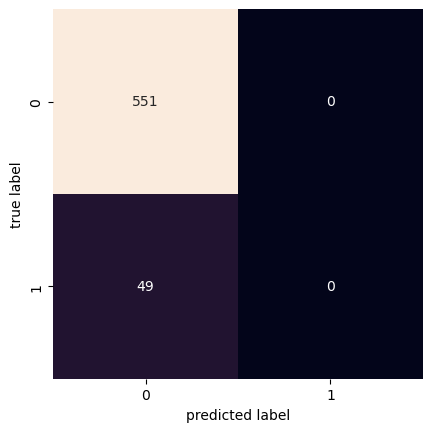

In [190]:
#karena akurasi kernel linear > RBF maka yang dieval linear
from sklearn.metrics import confusion_matrix
conf_matrix=confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, square=True, annot=True, fmt='d', cbar=False)
plt.ylabel('true label')
plt.xlabel('predicted label')

In [191]:
akurasi=accuracy_score(y_test, y_pred)
presisi=precision_score(y_test, y_pred, pos_label=0, average=None)
recalls=recall_score(y_test, y_pred, pos_label=0, average=None)
sensitivitas=conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])
spesifisitas=conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1])
print('Akurasi', akurasi)
print('Spesifitas', spesifisitas)
print('Sensitivitas', sensitivitas)
print('Presisi', presisi)
print('Recalls', recalls)
print("F1 SCore", f1_score)


Akurasi 0.9183333333333333
Spesifitas 0.0
Sensitivitas 1.0
Presisi [0.91833333 0.        ]
Recalls [1. 0.]
F1 SCore <function f1_score at 0x000001BE5747C3A0>


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [116]:
from sklearn.svm import SVC
svc=SVC()

In [117]:
from sklearn import svm
model=SVC(probability=True).fit(x_train,y_train)
probs=model.predict_proba(x_test)[:,1]

In [118]:
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

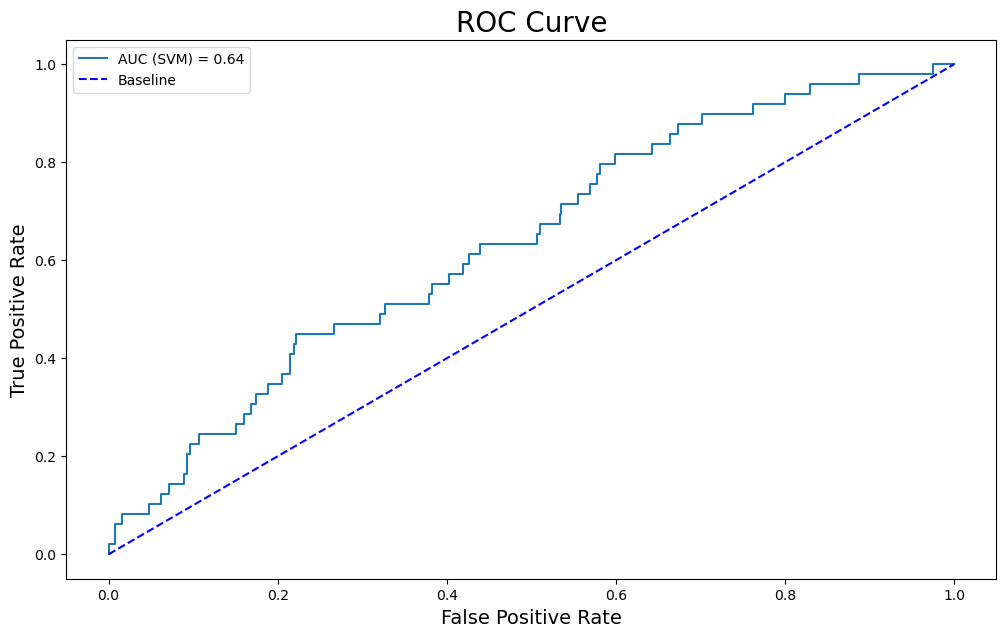

In [119]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
auc = roc_auc_score(y_test, probs)
fpr, tpr, threshold = roc_curve(y_test, probs)
plt.figure(figsize=(12, 7))
plt.plot(fpr, tpr, label=f'AUC (SVM) = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('ROC Curve', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend();

# Decision Tree

In [120]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [132]:
data=pd.read_csv("dataweek11.csv",delimiter=',')

In [133]:
#Mendefiisikan data untuk decision tree dengan nama datatree
#diambil data kategorik
df3=data.drop(['id','age','bmi','avg_glucose_level'], axis=1)
df3.dtypes

gender            object
hypertension       int64
heart_disease      int64
ever_married      object
work_type         object
Residence_type    object
smoking_status    object
stroke             int64
dtype: object

In [139]:
#endcoding features kategorik
df3['gender']=df3['gender'].map({'Female':0,'Male':1,'Other':2})
df3['ever_married']=df3['ever_married'].map({'Yes':0,'No':1})
df3['work_type']=df3['work_type'].map({'Private':0,'Self-employed':1,'children':2,'Govt_job':3,'Never_worked':4})
df3['Residence_type']=df3['Residence_type'].map({'Urban':0,'Rural':1})
df3['smoking_status']=df3['smoking_status'].map({'never smoked':0,'Unknown':1,'formerly smoked':2,'smokes':3})

In [140]:
#Mengubah codingan stroke (target) menjadi yes dan no
df3['stroke']=df3['stroke'].map({0:'yes',1:'no'})

In [141]:
df3.dtypes

gender             int64
hypertension       int64
heart_disease      int64
ever_married       int64
work_type          int64
Residence_type     int64
smoking_status     int64
stroke            object
dtype: object

In [192]:
#Mendefinisikan target menjadi y3 dan features menjadi x3
y3 = df3['stroke']
x3= df3[['gender','hypertension','ever_married','heart_disease','smoking_status','work_type','Residence_type']]
x3

,gender,hypertension,ever_married,heart_disease,smoking_status,work_type,Residence_type
0,1,0,0,1,2,0,0
1,0,0,0,0,0,1,1
2,1,0,0,1,0,0,1
3,0,0,0,0,3,0,0
4,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...
2995,1,0,0,0,2,0,0
2996,0,0,0,0,3,0,0
2997,1,0,0,1,2,0,0
2998,0,0,0,0,2,1,1


In [193]:
# Split dataset into training set and test set
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.3, random_state=500) # 70% training and 30% test

In [199]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x3_train,y3_train)

#Predict the response for test dataset
y3_pred = clf.predict(x3_test)

In [200]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y3_test, y3_pred))

Accuracy: 0.9


In [196]:
from sklearn import tree
#pembentukan model
clf=tree.DecisionTreeClassifier()
clf=clf.fit(x3,y3)

In [198]:
from sklearn.tree import export_text
r = export_text(clf, feature_names=['gender','hypertension','ever_married','heart_disease','smoking_status','work_type','Residence_type'])
print(r)

|--- hypertension <= 0.50
|   |--- heart_disease <= 0.50
|   |   |--- ever_married <= 0.50
|   |   |   |--- smoking_status <= 0.50
|   |   |   |   |--- work_type <= 0.50
|   |   |   |   |   |--- gender <= 0.50
|   |   |   |   |   |   |--- Residence_type <= 0.50
|   |   |   |   |   |   |   |--- class: yes
|   |   |   |   |   |   |--- Residence_type >  0.50
|   |   |   |   |   |   |   |--- class: yes
|   |   |   |   |   |--- gender >  0.50
|   |   |   |   |   |   |--- Residence_type <= 0.50
|   |   |   |   |   |   |   |--- class: yes
|   |   |   |   |   |   |--- Residence_type >  0.50
|   |   |   |   |   |   |   |--- class: yes
|   |   |   |   |--- work_type >  0.50
|   |   |   |   |   |--- work_type <= 2.00
|   |   |   |   |   |   |--- gender <= 0.50
|   |   |   |   |   |   |   |--- Residence_type <= 0.50
|   |   |   |   |   |   |   |   |--- class: yes
|   |   |   |   |   |   |   |--- Residence_type >  0.50
|   |   |   |   |   |   |   |   |--- class: yes
|   |   |   |   |   |   |--- gen

In [201]:
#pip install pydotplus

In [202]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn import tree

In [205]:
dot_data = StringIO()
feature_cols=['gender','hypertension','ever_married','heart_disease','smoking_status','work_type','Residence_type']
tree.export_graphviz(clf, out_file="tkmaulala_tree.dot",  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['Yes', 'No'])

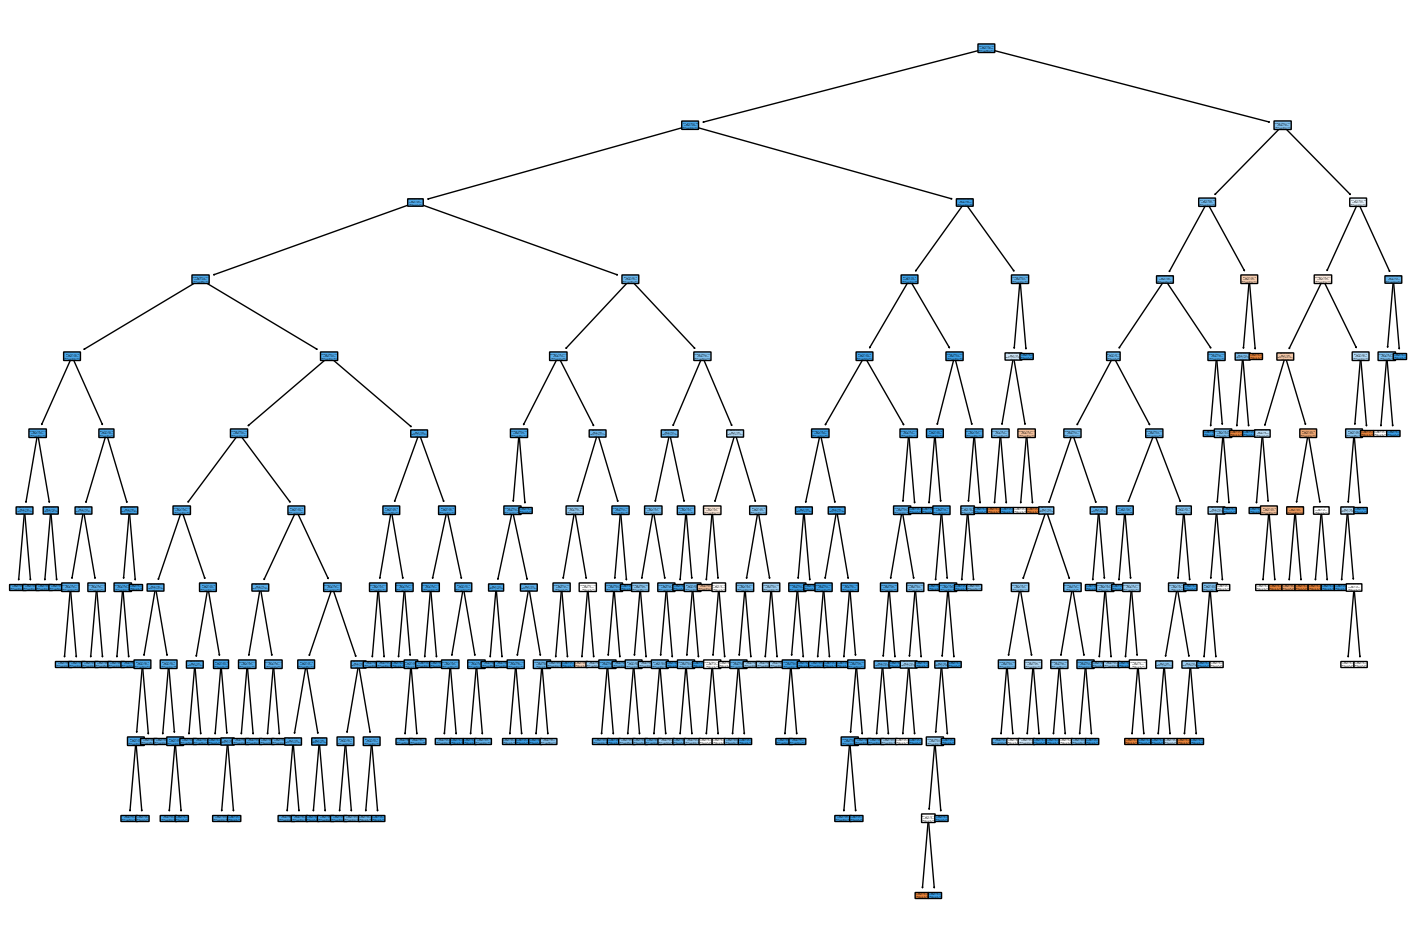

In [206]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 12))
plot_tree(clf,
          feature_names=['gender','hypertension','ever_married','heart_disease','smoking_status','work_type','Residence_type'],
          class_names=['Yes', 'No'],
          rounded=True, # Rounded node edges
          filled=True, # Adds color accoding to class
          proportion=True); # Displays the proportions of class samples instead of the whole number of samples

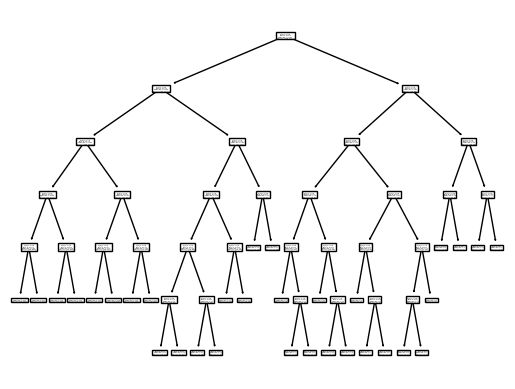

In [150]:

tree.plot_tree(clf);

# Naive bayes

In [22]:
df.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender,ever_married,work_type,Residence_type,smoking_status
0,9046,0.817073,0,1,0.801265,0.301260,1,1,1,2,1,1
1,51676,0.743902,0,0,0.679023,0.203895,1,0,1,3,0,2
2,31112,0.975610,0,1,0.234512,0.254296,1,1,1,2,0,2
3,60182,0.597561,0,0,0.536008,0.276060,1,0,1,2,1,3
4,1665,0.963415,1,0,0.549349,0.156930,1,0,1,3,0,2


In [24]:
df.dtypes

id                    object
age                  float64
hypertension          object
heart_disease         object
avg_glucose_level    float64
bmi                  float64
stroke                object
gender                 int32
ever_married           int32
work_type              int32
Residence_type         int32
smoking_status         int32
dtype: object

In [29]:
df['hypertension']=df['hypertension'].astype('category')
df['heart_diseasee']=df['heart_disease'].astype('category')
df['stroke']=df['stroke'].astype('category')
df['gender']=df['gender'].astype('category')
df['ever_married']=df['ever_married'].astype('category')
df['work_type']=df['work_type'].astype('category')
df['Residence_type']=df['Residence_type'].astype('category')
df['smoking_status']=df['smoking_status'].astype('category')

In [30]:
df.dtypes

id                     object
age                   float64
hypertension         category
heart_disease          object
avg_glucose_level     float64
bmi                   float64
stroke               category
gender               category
ever_married         category
work_type            category
Residence_type       category
smoking_status       category
heart_diseasee       category
dtype: object

In [31]:
from sklearn.model_selection import train_test_split

In [ ]:
#definisi x dan y
y=df['stroke']
x=df.drop(['id','stroke'],axis=1)

In [43]:
#split data
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.25, random_state=123)

In [44]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
#fit train set pake gaussian naive bayes
nb.fit(x_train,y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:964: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(


GaussianNB()

In [45]:
#compute the  accurancy of train set
nb.score(x_train,y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


0.8781315240083507

In [46]:
y_predict={}
y_predict['nb']=nb.predict(x_test)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score
#create an empty dictionary for confussion metrices
conf_matrix={}
#add new keys and assign the confussion matrices results
classif_name=['nb']
for name in classif_name:
    conf_matrix[name]=pd.DataFrame(data=confusion_matrix(y_test,y_predict[name]),
                                  columns=df['stroke'].unique(),
                                  index=df['stroke'].unique())

In [48]:
conf_matrix['nb'] 

,1,0
1,1096,124
0,37,21


In [49]:
np.array(y_test)

array(['0', '0', '0', ..., '0', '0', '0'], dtype=object)

In [50]:
np.array(y_train)

array(['0', '0', '0', ..., '0', '0', '0'], dtype=object)

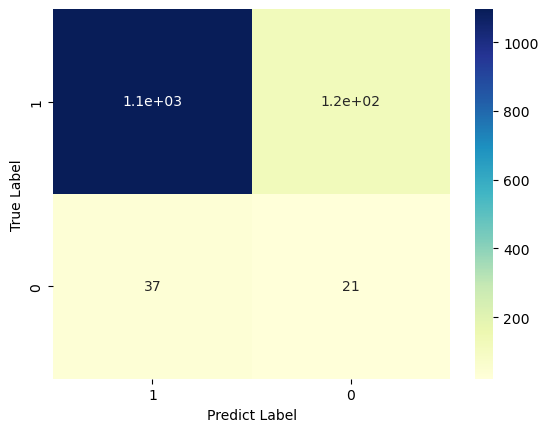

In [51]:
#Create heatmap for NB confusion NB
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(conf_matrix['nb'], annot=True, cmap='YlGnBu'). set(ylabel='True Label', xlabel='Predict Label')
plt.show()

In [52]:
nb.predict_proba(x_test) #probabilotas per observasi

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


array([[9.99999993e-01, 7.31835551e-09],
       [9.99999798e-01, 2.01924142e-07],
       [9.97956051e-01, 2.04394921e-03],
       ...,
       [9.99999720e-01, 2.80166295e-07],
       [9.99999691e-01, 3.09051566e-07],
       [9.91659670e-01, 8.34032999e-03]])

In [53]:
for name in classif_name:
    print('{0}accuracy={1:f}'.format(name,accuracy_score(y_test,y_predict['nb'])))

nbaccuracy=0.874022


In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict['nb']))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93      1220
           1       0.14      0.36      0.21        58

    accuracy                           0.87      1278
   macro avg       0.56      0.63      0.57      1278
weighted avg       0.93      0.87      0.90      1278

